# Práctica II: Visualización de los datos
Equipo: 6

Grupo: 003, Lunes de 6:00 a 9:00 pm

Integrantes:
* 1728247 Castillo Cerda Manuel Orlando
* 1854568 Cedillo Hernandez Vanessa Nahomy
* 1847759 Lozano Rangel Antonio de Jesus
* 1795359 Vega Flores Blanca Janeth

## Base de datos principal
* Nombre: Donación de Órganos en México
* Url: https://www.kaggle.com/joshdoit/master

Importación de librerías y base de datos

In [1]:
import pandas as pd
import numpy as np

# Lectura csv
df_org = pd.read_csv("/Users/ManuelOrlando/Desktop/FACULTAD/Licenciatura en Actuaria/6to Semestre (7mo)/Mineria de Datos/Donacion organos Mex.csv")
df_org.shape #Muestra la cantidad de columnas y filas que tiene nuestra base

(44583, 24)

### Limpieza de datos
Antes de avanzar, se requiere eliminar aquellos valores que podrían afectar los resultados estadísticos. 
Para ello, se realizaron los siguientes 3 pasos de limpieza:
1. Se eliminaron las filas con valores nulos, lo cual es posible ya que son pocas, entonces no afectan nuestro análisis.

In [2]:
df_org = df_org.dropna() #Elimina filas con valores nulos.
df_org.isnull().sum() #Verifica que no haya ningún valor nulo en las columnas.

SEXO                         0
CODIGO_SEXO                  0
TIPO_DONANTE                 0
MUERTE                       0
ENTIDAD_FEDERATIVA           0
CODIGO_ENTIDAD_FEDERATIVA    0
ESTABLECIMIENTO              0
INSTITUCION                  0
EDAD_ANIOS                   0
FECHA_PROCURACION            0
RINON_IZQUIERDO              0
RINON_DERECHO                0
RINON_BLOCK                  0
PULMON_IZQUIERDO             0
PULMON_DERECHO               0
CORAZON                      0
HIGADO                       0
PANCREAS                     0
INTESTINO                    0
CORNEA_IZQUIERDA             0
CORNEA_DERECHA               0
PIEL                         0
HUESOS                       0
CORAZON_TEJIDOS              0
dtype: int64

2. Se eliminaron las columnas que contienen códigos, ya que se considera que no son necesarias.

In [3]:
df_org = df_org.drop(['CODIGO_SEXO', 'CODIGO_ENTIDAD_FEDERATIVA'], axis=1) #Elimina las columnas que se introduzcan.
df_org.shape #Muestra la cantidad de columnas y filas que ahora tiene nuestra base.

(44579, 22)

3. Anteriormente, se encontró que ciertos donantes tenían edades "imposibles", es decir, se mostraban personas menores de 0 o mayores a 100 años, por lo cual también se eliminaron sus filas correspondientes.

In [4]:
df_org = df_org.drop(df_org[df_org['EDAD_ANIOS']>110].index) #Elimina donantes con edad mayor a 100
df_org = df_org.drop(df_org[df_org['EDAD_ANIOS']<0].index) #Elimina donantes con edad menor a 0
df_org.shape #Muestra la cantidad de columnas y filas que ahora tiene nuestra base.

# http://exponentis.es/como-eliminar-filas-de-un-dataframe-de-python-pandas-segun-una-condicion

(44511, 22)

Una vez realizado lo anterior, podemos trabajar con nuestros datos.

### Información estadística básica¶

Iniciamos mostrando las columnas de nuestra base de datos, para saber con que estamos trabajando.

In [5]:
df_org.columns #Muestra las columnas de nuestra base de datos

Index(['SEXO', 'TIPO_DONANTE', 'MUERTE', 'ENTIDAD_FEDERATIVA',
       'ESTABLECIMIENTO', 'INSTITUCION', 'EDAD_ANIOS', 'FECHA_PROCURACION',
       'RINON_IZQUIERDO', 'RINON_DERECHO', 'RINON_BLOCK', 'PULMON_IZQUIERDO',
       'PULMON_DERECHO', 'CORAZON', 'HIGADO', 'PANCREAS', 'INTESTINO',
       'CORNEA_IZQUIERDA', 'CORNEA_DERECHA', 'PIEL', 'HUESOS',
       'CORAZON_TEJIDOS'],
      dtype='object')

Es importante analizar la información estadística de todas las columnas cuyo valor corresponde a los órganos donados, sin embargo, para no hacer la práctica tan larga y tener que analizar órgano por órgano, se generará una nueva columna, cuyos datos sean la cantidad total de órganos donados.

In [6]:
df_org['SUMA']=df_org['RINON_IZQUIERDO']+df_org['RINON_DERECHO']+df_org['RINON_BLOCK']+df_org['PULMON_IZQUIERDO']+df_org['PULMON_DERECHO']+df_org['CORAZON']+df_org['HIGADO']+df_org['PANCREAS']+df_org['INTESTINO']+df_org['CORNEA_IZQUIERDA']+df_org['CORNEA_DERECHA']+df_org['PIEL']+df_org['HUESOS']+df_org['CORAZON_TEJIDOS']

In [7]:
df_org['SUMA'].sum()

78867

In [8]:
df_org['SUMA'].mean()

1.771854148412752

In [9]:
df_org['SUMA'].cumsum()

0            2
1            4
2            8
3            9
4           11
         ...  
44578    78863
44579    78864
44580    78865
44581    78866
44582    78867
Name: SUMA, Length: 44511, dtype: int64

In [10]:
df_org['SUMA'].describe()

count    44511.000000
mean         1.771854
std          1.275455
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: SUMA, dtype: float64

In [11]:
df_org['SUMA'].count()

44511

In [12]:
df_org['SUMA'].min()

0

In [13]:
df_org['SUMA'].max()

19

In [14]:
df_org['SUMA'].median()

1.0

In [15]:
df_org['SUMA'].var()

1.6267845175730977

In [16]:
df_org['SUMA'].std()

1.275454631718862

In [17]:
df_org['SUMA'].skew()

2.27036569719243

In [18]:
df_org['SUMA'].kurt()

6.807356876248567

In [19]:
df_org.corr()

,EDAD_ANIOS,RINON_IZQUIERDO,RINON_DERECHO,RINON_BLOCK,PULMON_IZQUIERDO,PULMON_DERECHO,CORAZON,HIGADO,PANCREAS,INTESTINO,CORNEA_IZQUIERDA,CORNEA_DERECHA,PIEL,HUESOS,CORAZON_TEJIDOS,SUMA
EDAD_ANIOS,1.000000,-0.149541,-0.354780,-0.093177,-0.007609,-0.011192,-0.089650,-0.153392,-0.011956,-0.008314,0.248648,0.246413,-0.005570,0.084046,-0.056426,0.021685
RINON_IZQUIERDO,-0.149541,1.000000,0.279075,-0.011660,0.041358,0.037312,0.235050,0.501024,0.053706,0.012656,0.223398,0.226385,0.148770,0.169015,0.099219,0.734399
RINON_DERECHO,-0.354780,0.279075,1.000000,-0.063677,0.011368,0.012208,0.057937,0.109873,0.013972,0.003293,-0.695014,-0.696727,-0.019989,-0.176440,0.017394,-0.181792
RINON_BLOCK,-0.093177,-0.011660,-0.063677,1.000000,-0.000803,0.014761,0.033751,0.075330,-0.000986,-0.000232,0.006045,0.007347,0.012396,-0.003372,0.028690,0.041328
PULMON_IZQUIERDO,-0.007609,0.041358,0.011368,-0.000803,1.000000,0.793682,0.172013,0.065285,0.278759,-0.000078,0.011225,0.013966,0.040120,0.019373,-0.000698,0.105581
PULMON_DERECHO,-0.011192,0.037312,0.012208,0.014761,0.793682,1.000000,0.177574,0.066706,0.314933,-0.000071,0.015314,0.018420,0.037811,0.013905,-0.000639,0.108963
CORAZON,-0.089650,0.235050,0.057937,0.033751,0.172013,0.177574,1.000000,0.283745,0.121462,-0.000438,0.069932,0.070579,0.073764,0.055143,-0.003944,0.308301
HIGADO,-0.153392,0.501024,0.109873,0.075330,0.065285,0.066706,0.283745,1.000000,0.099207,0.019901,0.123104,0.123672,0.126802,0.116817,0.129886,0.536501
PANCREAS,-0.011956,0.053706,0.013972,-0.000986,0.278759,0.314933,0.121462,0.099207,1.000000,0.141356,0.021770,0.020562,0.039867,0.017362,-0.000858,0.112410
INTESTINO,-0.008314,0.012656,0.003293,-0.000232,-0.000078,-0.000071,-0.000438,0.019901,0.141356,1.000000,0.004850,0.004845,-0.000514,0.014727,-0.000202,0.023146


In [20]:
df_org.cov()

,EDAD_ANIOS,RINON_IZQUIERDO,RINON_DERECHO,RINON_BLOCK,PULMON_IZQUIERDO,PULMON_DERECHO,CORAZON,HIGADO,PANCREAS,INTESTINO,CORNEA_IZQUIERDA,CORNEA_DERECHA,PIEL,HUESOS,CORAZON_TEJIDOS,SUMA
EDAD_ANIOS,241.813742,-0.773900,-2.678674,-8.231513e-02,-3.410845e-03,-4.441895e-03,-1.440063e-01,-0.541873,-0.006230,-6.128283e-04,2.182659,2.160636,-9.667385e-03,0.388298,-5.636469e-02,0.430096
RINON_IZQUIERDO,-0.773900,0.110756,0.045095,-2.204479e-04,3.967838e-04,3.169265e-04,8.080432e-03,0.037879,0.000599,1.996432e-05,0.041968,0.042482,5.525989e-03,0.016712,2.121111e-03,0.311731
RINON_DERECHO,-2.678674,0.045095,0.235744,-1.756440e-03,1.591230e-04,1.512807e-04,2.905810e-03,0.012119,0.000227,7.577285e-06,-0.190491,-0.190748,-1.083222e-03,-0.025452,5.424921e-04,-0.112580
RINON_BLOCK,-0.082315,-0.000220,-0.001756,3.227467e-03,-1.314365e-06,2.140285e-05,1.980684e-04,0.000972,-0.000002,-6.258882e-08,0.000194,0.000235,7.859893e-05,-0.000057,1.046985e-04,0.002995
PULMON_IZQUIERDO,-0.003411,0.000397,0.000159,-1.314365e-06,8.310513e-04,5.839582e-04,5.122329e-04,0.000428,0.000269,-1.059972e-08,0.000183,0.000227,1.290879e-04,0.000166,-1.293166e-06,0.003882
PULMON_DERECHO,-0.004442,0.000317,0.000151,2.140285e-05,5.839582e-04,6.513931e-04,4.681573e-04,0.000387,0.000269,-8.580725e-09,0.000221,0.000265,1.077093e-04,0.000105,-1.046848e-06,0.003547
CORAZON,-0.144006,0.008080,0.002906,1.980684e-04,5.122329e-04,4.681573e-04,1.067046e-02,0.006658,0.000420,-2.145181e-07,0.004078,0.004111,8.504498e-04,0.001692,-2.617121e-05,0.040619
HIGADO,-0.541873,0.037879,0.012119,9.721936e-04,4.275442e-04,3.867615e-04,6.658479e-03,0.051607,0.000755,2.142910e-05,0.015787,0.015842,3.215078e-03,0.007884,1.895410e-03,0.155450
PANCREAS,-0.006230,0.000599,0.000227,-1.877664e-06,2.692843e-04,2.693449e-04,4.204348e-04,0.000755,0.001123,2.245172e-05,0.000412,0.000389,1.491062e-04,0.000173,-1.847380e-06,0.004804
INTESTINO,-0.000613,0.000020,0.000008,-6.258882e-08,-1.059972e-08,-8.580725e-09,-2.145181e-07,0.000021,0.000022,2.246636e-05,0.000013,0.000013,-2.720595e-07,0.000021,-6.157932e-08,0.000140


### Graficar datos univariantes.

Importación de librerías.

In [21]:
import matplotlib as plt
%matplotlib inline

##### Gráfica de barras y datos categoricos

In [22]:
df_org.plot.bar()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001EA9EA97040> (for post_execute):


KeyboardInterrupt: 

En el código anterior se intentó generar un plot de todos los datos, sin embargo, al ser demasiados y no todos numéricos, nos marca error. Debido a esto, mejor mandamos a llamar a una sola columna, la cual contiene la entidad federativa a la que pertenece el donante, dichos datos no son numéricos, por lo cual se usó para cambiarlos la función value_counts que es la suma que tiene cada valor único.

<AxesSubplot:>

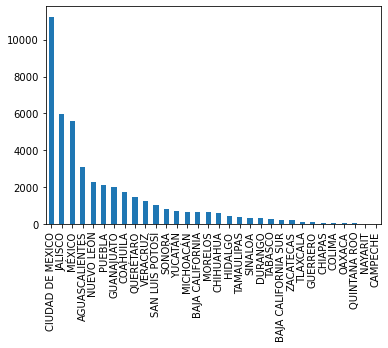

In [23]:
df_org['ENTIDAD_FEDERATIVA'].value_counts().plot.bar()

Podemos notar que la mayoría de los donantes realizaron el procedimiento médico en la Cd. de México, sin embargo, no sabemos realmente que proporción de donantes le corresponde a cada entidad federativa, por lo cual se realiza la siguiente gráfica, donde el eje y muestra dicha proporción en lugar de la cantidad.

<AxesSubplot:>

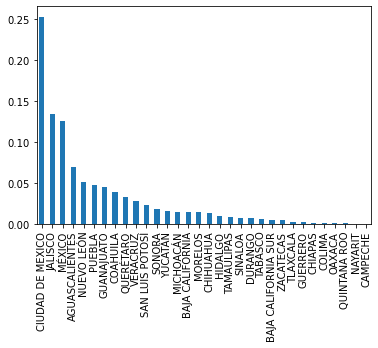

In [24]:
(df_org['ENTIDAD_FEDERATIVA'].value_counts() / len(df_org)).plot.bar()

De acuerdo con lo anterior, aproximadamente la cuarta parte de todos los donantes realizaron el procedimiento médico en la Cd. de México. Ahora, procedemos a mostrar la misma gráfica, pero con el eje x en orden alfabético.

<AxesSubplot:>

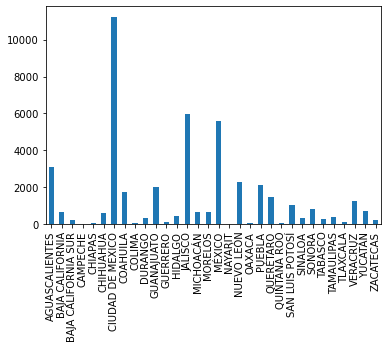

In [25]:
df_org['ENTIDAD_FEDERATIVA'].value_counts().sort_index().plot.bar()

##### Gráfica de lineas

En las siguientes gráficas se trabajará con la columna de las edades de los donantes, con el objetivo de visualizar en que rango de edad se encuentran la mayoría de los donadores.

<AxesSubplot:>

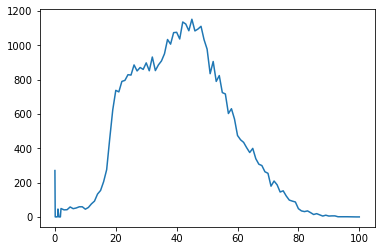

In [26]:
df_org['EDAD_ANIOS'].value_counts().sort_index().plot.line()

<AxesSubplot:>

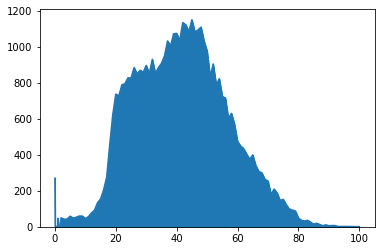

In [27]:
df_org['EDAD_ANIOS'].value_counts().sort_index().plot.area()

De acuerdo con las gráficas anteriores, la mayoría de los donadores tenían aproximadamente 45 años cuando realizaron el procedimiento médico correspondiente, y podemos notar que son pocos los donadores cuya edad es menor a 20 o mayor a 70 años.

##### Histogramas

<AxesSubplot:ylabel='Frequency'>

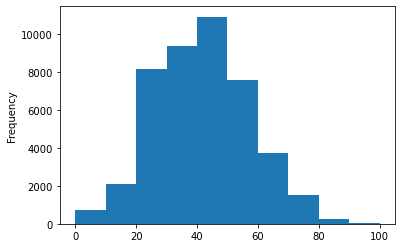

In [28]:
df_org['EDAD_ANIOS'].plot.hist()

Este histograma reafirma lo mencionado antes, la mayoría de los donadores realizaron el procedimiento correspondiente cuando tenían entre 40 y 50 años.

### Graficar datos bi-variantes.

##### Scatter plot

<AxesSubplot:xlabel='EDAD_ANIOS', ylabel='ENTIDAD_FEDERATIVA'>

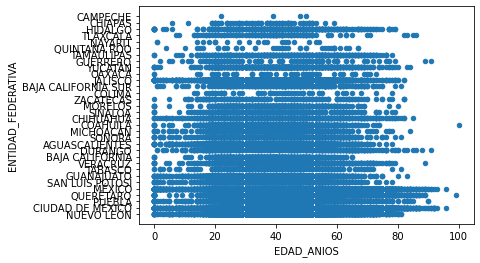

In [29]:
df_org.plot.scatter(x='EDAD_ANIOS', y='ENTIDAD_FEDERATIVA')

La gráfica anterior resulta no ser muy explicativa, por lo cual se procede a hacer más pequeña nuestra muestra de datos.

<AxesSubplot:xlabel='EDAD_ANIOS', ylabel='ENTIDAD_FEDERATIVA'>

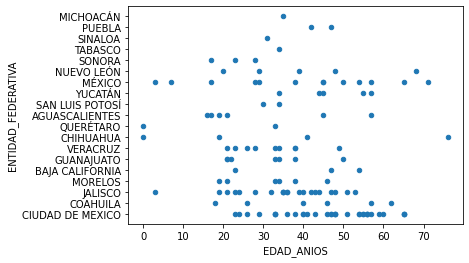

In [30]:
df_org.sample(130).plot.scatter(x='EDAD_ANIOS', y='ENTIDAD_FEDERATIVA')

Ahora si, esta gráfica nos muestra que la edad del donante y la entidad federativa en la que se realizó el procedimiento médico no están tan relacionadas.

##### Hexagonal plot

In [31]:
df_org.plot.hexbin(y='ENTIDAD_FEDERATIVA', x='SUMA', gridsize=15)

ValueError: hexbin requires y column to be numeric

La gráfica anterior no puedo realizarse, ya que en este tipo de gráfico es necesario que los datos a trabajar sean numéricos.
Por lo cual, se tomó la decisión de mejor utilizar la edad del donante y la cantidad total de donaciones que realizó.

<AxesSubplot:xlabel='SUMA', ylabel='EDAD_ANIOS'>

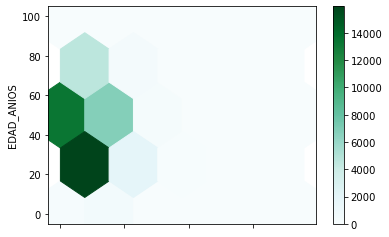

In [32]:
df_org.plot.hexbin(y='EDAD_ANIOS', x='SUMA', gridsize=5)

En esta gráfica podemos ver que se genera un cluster en los donadores de 40 años, con ello nuevamente se reafirma que la mayoría de los donadores rondan en esta edad.

##### Stacked plots

<AxesSubplot:xlabel='ENTIDAD_FEDERATIVA'>

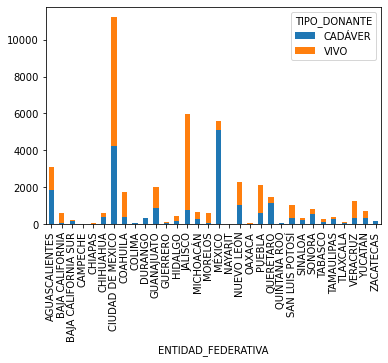

In [33]:
df2 = df_org.groupby(['ENTIDAD_FEDERATIVA', 'TIPO_DONANTE'])['ENTIDAD_FEDERATIVA'].count().unstack('TIPO_DONANTE').fillna(0)
df2.plot.bar(stacked=True)

# https://stackoverflow.com/questions/23415500/pandas-plotting-a-stacked-bar-chart

Ya habíamos visto que la mayoría de los donadores realizaron el procedimiento médico en la Cd. de México y, de acuerdo con esta gráfica, podemos decir que en dicho lugar se tiene una buena cultura de donación, pues la mayoría de sus habitantes realizan donaciones mientras viven. En cambio, tenemos todo lo contrario en el estado de México, en el cual la mayoría de las personas donan solamente cuando fallecen.

<AxesSubplot:xlabel='EDAD_ANIOS'>

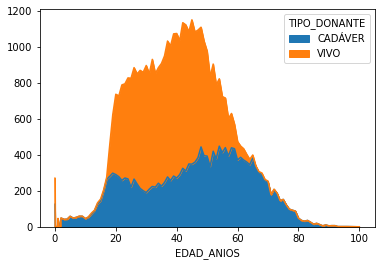

In [34]:
df3 = df_org.groupby(['EDAD_ANIOS', 'TIPO_DONANTE'])['EDAD_ANIOS'].count().unstack('TIPO_DONANTE').fillna(0)
df3.plot.area()

<AxesSubplot:xlabel='EDAD_ANIOS'>

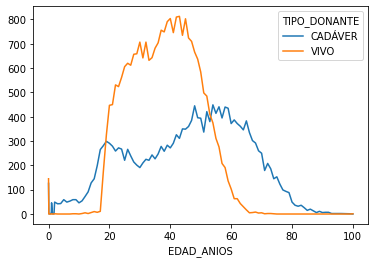

In [35]:
df3.plot.line()

El resultado de las gráficas anteriores quizás pueda ser algo obvio, pues, de acuerdo con la ley, los menores de edad no pueden donar órganos, luego las personas entre los 20 y 45 años normalmente cuentan con buena salud lo cual les permite realizar donaciones sin problema, y posterior a ello, quienes tienen más de 45 años prefieren no correr el riesgo, o simplemente no son aptos para realizar el procedimiento. Así mismo, la mayoría de las personas fallecen aproximadamente a los 60 años, y en la gráfica podemos notar que la mayoría de los donadores de tipo cadáver rondan en esta edad.

##### Countplot

C:\Users\ManuelOrlando\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'IMSS'),
  Text(1, 0, 'SSE'),
  Text(2, 0, 'PRIVADO'),
  Text(3, 0, 'SSA'),
  Text(4, 0, 'ISSSTE'),
  Text(5, 0, 'PEMEX'),
  Text(6, 0, 'SEDENA'),
  Text(7, 0, 'SNTE'),
  Text(8, 0, 'SEMAR')])

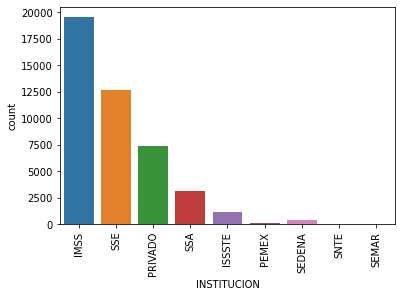

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df_org['INSTITUCION'])
plt.xticks(rotation=90)

Esta gráfica nos muestra que la mayoría de los donantes realizaron el procedimiento correspondiente en el IMSS.

##### Gráficas KDE

<AxesSubplot:xlabel='EDAD_ANIOS', ylabel='Density'>

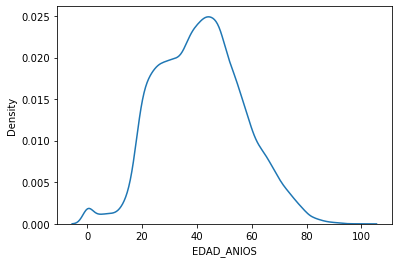

In [37]:
sns.kdeplot(df_org['EDAD_ANIOS'])

<AxesSubplot:>

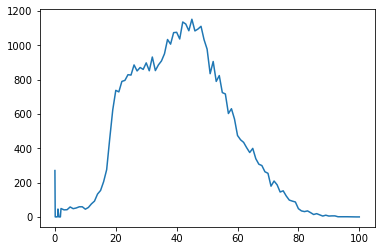

In [38]:
df_org['EDAD_ANIOS'].value_counts().sort_index().plot.line()

<AxesSubplot:xlabel='EDAD_ANIOS', ylabel='SUMA'>

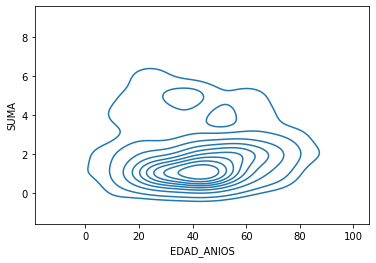

In [39]:
sns.kdeplot(x=df_org['EDAD_ANIOS'].dropna().sample(200),y=df_org['SUMA'])

# https://seaborn.pydata.org/generated/seaborn.kdeplot.html

Nuevamente, podemos visualizar en estas gráficas que la mayoría de los donadores realizaron el procedimiento médico a los 40 años.

##### Gráfica de distancias

C:\Users\ManuelOrlando\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AÑO'>

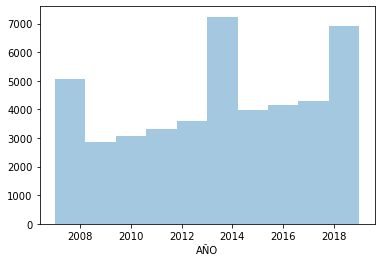

In [40]:
df_org['AÑO']=pd.to_numeric(df_org['FECHA_PROCURACION'].str[:4])
sns.distplot(df_org['AÑO'], bins=10, kde=False)

# Busque como usar la función left en python, para obtener solamente el año de la fecha de procuración.
# https://datatofish.com/left-right-mid-pandas/

Esta gráfica muestra una tendencia ascendente en la cantidad de donadores en el transcurso de los años.

##### Jointplot

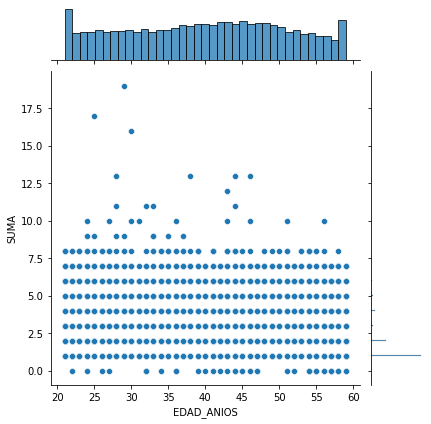

In [41]:
sns.jointplot(x='EDAD_ANIOS', y='SUMA', data=df_org[(df_org['EDAD_ANIOS']>20)&(df_org['EDAD_ANIOS']<60)])

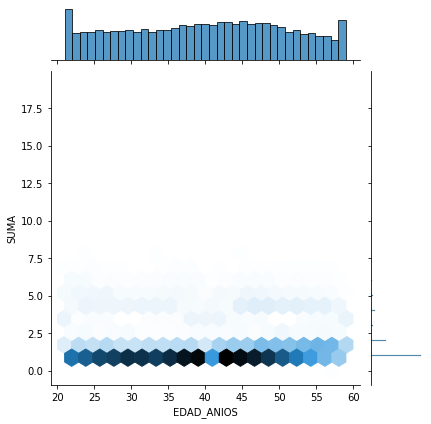

In [42]:
sns.jointplot(x='EDAD_ANIOS', y='SUMA', data=df_org[(df_org['EDAD_ANIOS']>20)&(df_org['EDAD_ANIOS']<60)], kind='hex', gridsize=20)

##### Boxplot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'IMSS'),
  Text(1, 0, 'SSE'),
  Text(2, 0, 'PRIVADO'),
  Text(3, 0, 'SSA'),
  Text(4, 0, 'ISSSTE'),
  Text(5, 0, 'PEMEX'),
  Text(6, 0, 'SEDENA'),
  Text(7, 0, 'SNTE'),
  Text(8, 0, 'SEMAR')])

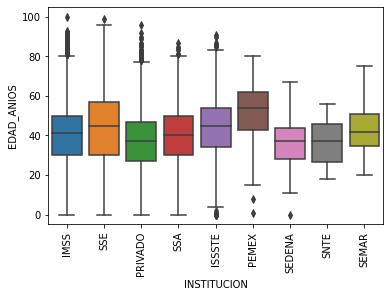

In [43]:
df_bp= df_org[df_org.INSTITUCION.isin(df_org.INSTITUCION.value_counts().head(9).index)]

sns.boxplot(x='INSTITUCION',y='EDAD_ANIOS',data=df_bp)
plt.xticks(rotation=90)

##### Gráfica de violín

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'IMSS'),
  Text(1, 0, 'SSE'),
  Text(2, 0, 'PRIVADO'),
  Text(3, 0, 'SSA'),
  Text(4, 0, 'ISSSTE'),
  Text(5, 0, 'PEMEX'),
  Text(6, 0, 'SEDENA'),
  Text(7, 0, 'SNTE'),
  Text(8, 0, 'SEMAR')])

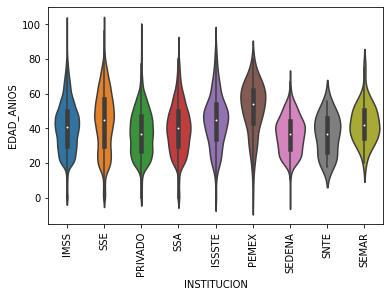

In [44]:
sns.violinplot(x='INSTITUCION',y='EDAD_ANIOS',data=df_org[df_org.INSTITUCION.isin(df_org.INSTITUCION.value_counts()[:9].index)])
plt.xticks(rotation=90)

De acuerdo con las gráficas anteriores (boxplot y la de violín), podemos decir que los donadores más grandes de edad realizan el procedimiento correspondiente en PEMEX, mientras que los más chicos lo realizaron en una institución privada o en el SNTE.

##### Gráfica de pares

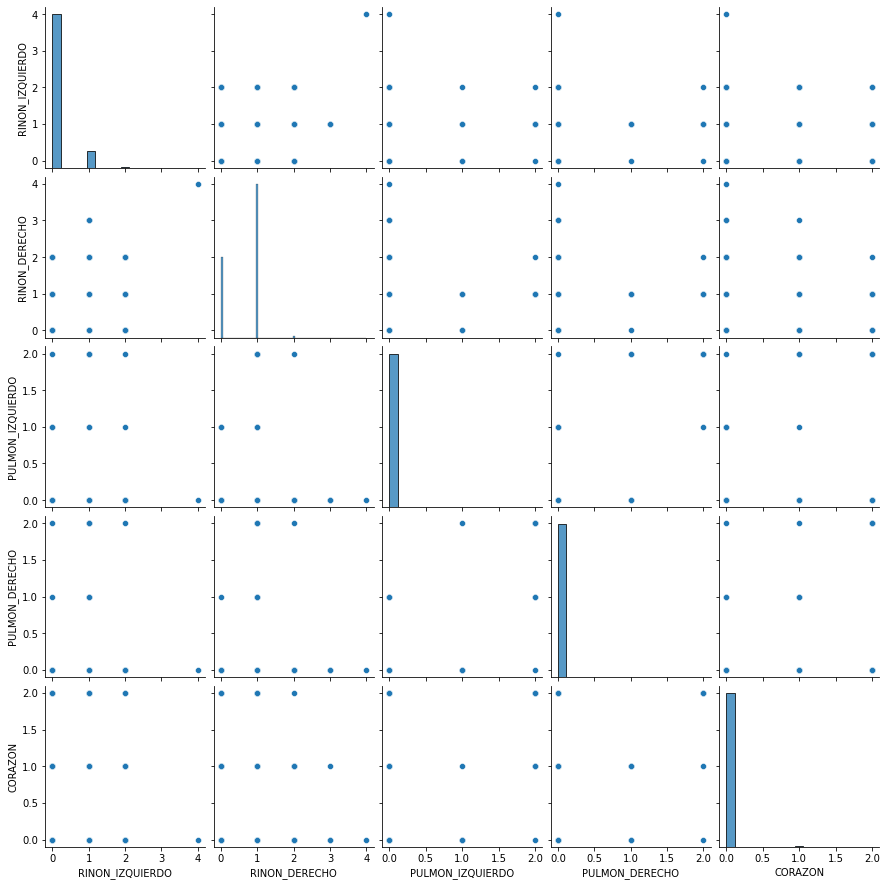

In [45]:
sns.pairplot(df_org[['RINON_IZQUIERDO', 'RINON_DERECHO','PULMON_IZQUIERDO','PULMON_DERECHO','CORAZON']])

### Gráficas multi variantes

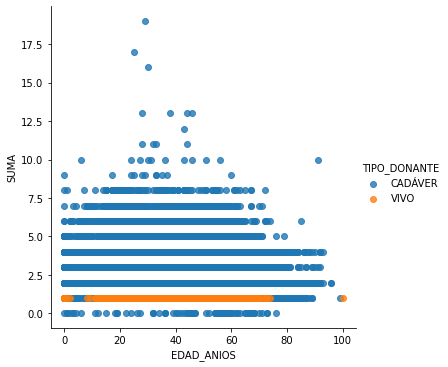

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='EDAD_ANIOS',y='SUMA',hue='TIPO_DONANTE',data=df_org.loc[df_org['TIPO_DONANTE'].isin(['CADÁVER', 'VIVO'])],fit_reg=False)

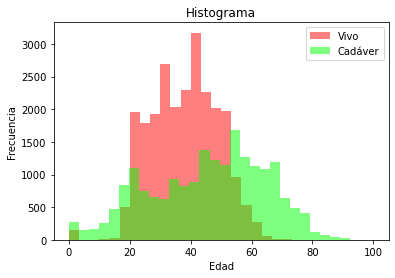

In [47]:
V = plt.hist(df_org[df_org["TIPO_DONANTE"]=="VIVO"].EDAD_ANIOS,bins=30,fc = (1,0,0,0.5),label = "Vivo")
M = plt.hist(df_org[df_org["TIPO_DONANTE"]=="CADÁVER"].EDAD_ANIOS,bins=30,fc = (0,1,0,0.5),label = "Cadáver")
plt.legend()
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Histograma")
plt.show()

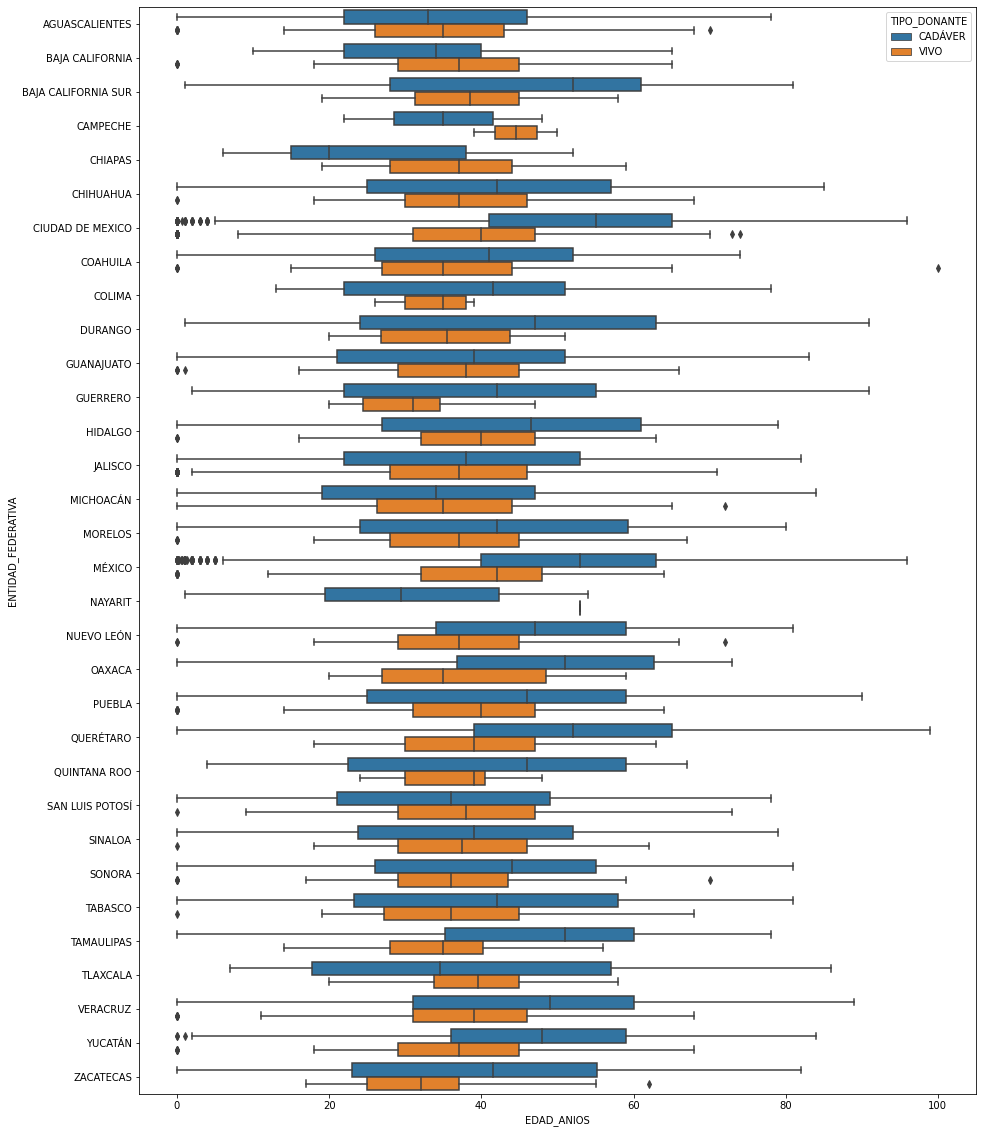

In [48]:
plt.figure(figsize = (15,20))
sns.boxplot(x="EDAD_ANIOS", y="ENTIDAD_FEDERATIVA",hue="TIPO_DONANTE",
            data=df_org, order=df_org['ENTIDAD_FEDERATIVA'].value_counts().sort_index().index)
plt.show()

# https://www.it-swarm-es.com/es/python/ordenando-boxplot-eje-x-en-seaborn/829355397/

La gráfica anterior nos permite visualizar que en la mayoría de los estados predominan los donadores de tipo cadáver, además que a los donadores de mayor edad se les realizó el procedimiento médico en Querétaro y en la Cd. de México, mientras que a los de menor edad se les realizó en Chiapas.

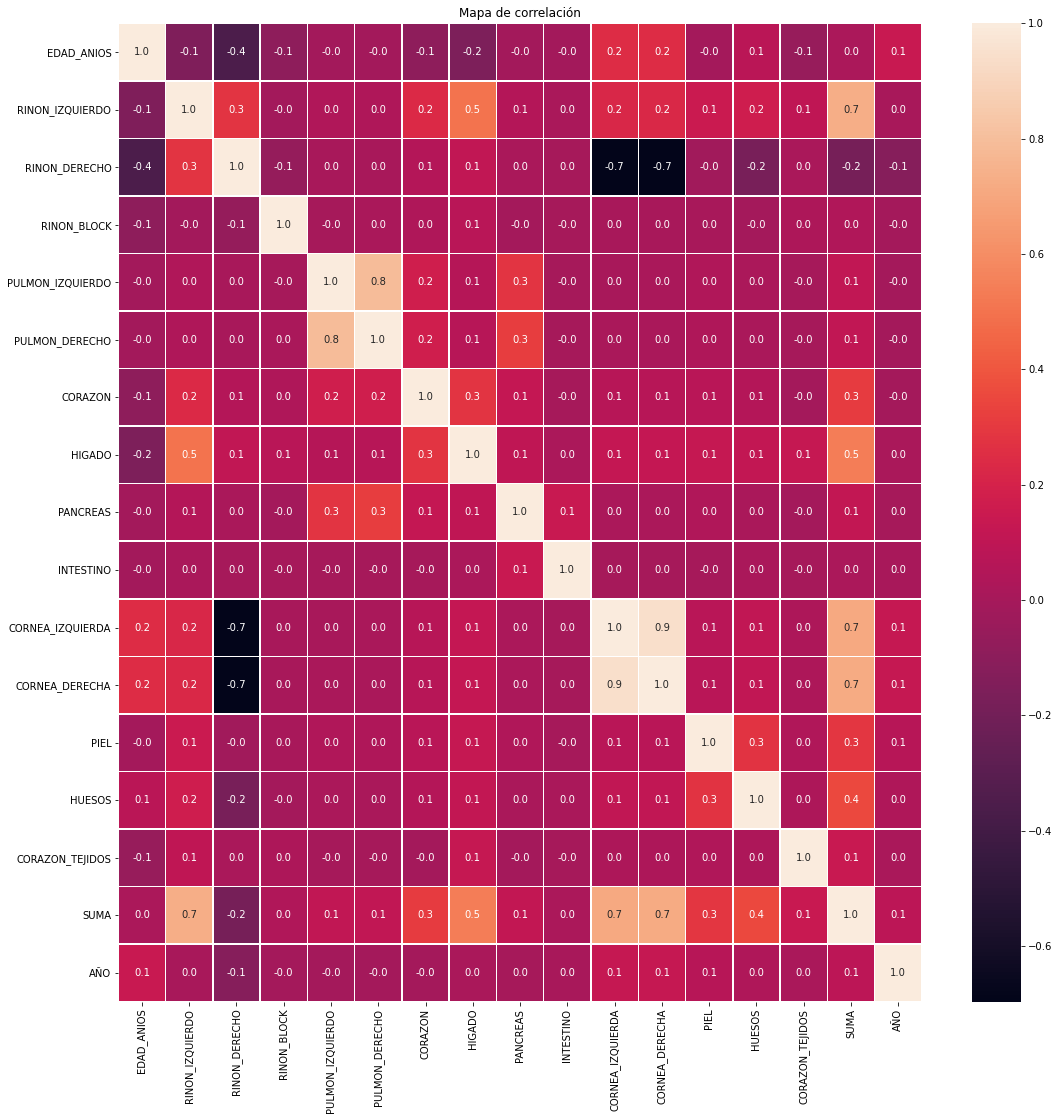

In [49]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(df_org.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Mapa de correlación')
plt.savefig('graph.png')
plt.show()